In [1]:
from numpy import *
from scipy.special import *
from matplotlib.pyplot import *
%matplotlib inline

# Ejercicio 1

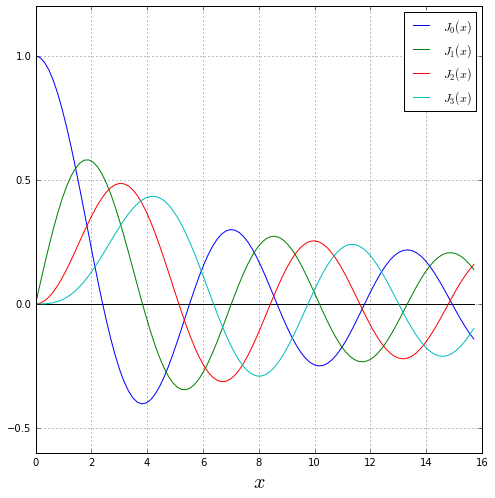

In [2]:
# Se crea una figura
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Se crea el arreglo de valores de x
x = linspace(0,5*pi, 100)

# Se grafica el eje y=0
ax.plot(x, zeros_like(x), 'black')

# Como se quiero las primeras 4 funciones de Bessel J se crea dentro de un for
for m in range(4):
    # Se calcula la funcion de Bessel
    Bessel_m = jv(m, x)
    # Se grafica la funcion de Bessel
    ax.plot(x, Bessel_m, label='$J_{}(x)$'.format(m))

# Se agregan cosas para que la grafica se vea bonita
ax.set_xlabel("$x$", fontsize=20)
ax.grid(True)
ax.legend(loc='best')

# Ejercicio 2

In [3]:
def derivada(f, x, h=0.01, args=0.0):
    if args == 0.0:
        f_prime = f(x+h, args)-f(x, args)
    else:
        f_prime = f(x+h, args)-f(x, args)
    return f_prime/h

def f_(x, args=0.0):
    return x*x*x - 5*x +2

def f_prime(x):
    return 3*x*x - 5

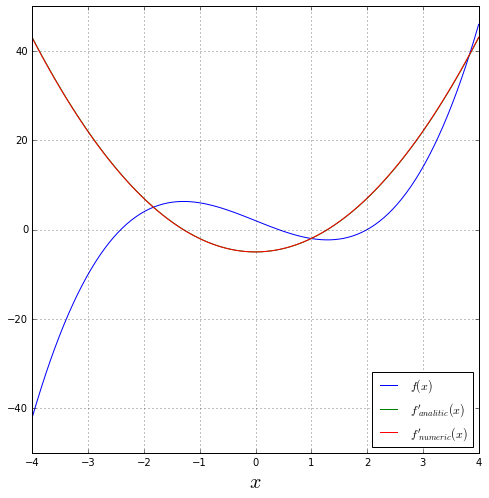

In [4]:
# Se crea una figura
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Se crea el arreglo de valores de x
x = linspace(-4,4, 100)

# Se calculan todas las funciones
f_graf = f_(x)
f_prime_analitic = f_prime(x)
f_prime_numeric = derivada(f_, x)

# Se grafican las funciones
ax.plot(x, f_graf, label='$f(x)$')
ax.plot(x, f_prime_analitic, label='$f\'_{analitic}(x)$')
ax.plot(x, f_prime_numeric, label='$f\'_{numeric}(x)$')

# Se agregan cosas para que la grafica se vea bonita
ax.set_xlabel("$x$", fontsize=20)
ax.grid(True)
ax.legend(loc='best')

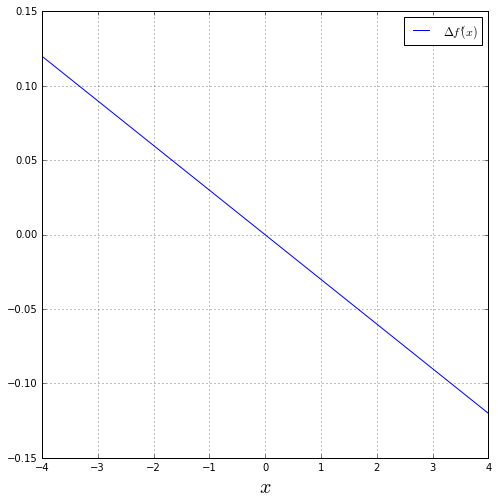

In [5]:
# Se grafica la diferencia entre la derivada numerica y la derivada analitica

# Se crea una figura
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

f_prime_dif = f_prime_analitic - f_prime_numeric
ax.plot(x, f_prime_dif, label='$\Delta f\'(x)$')

ax.set_xlabel("$x$", fontsize=20)
ax.grid(True)
ax.legend(loc='best')

# Ejercicio 3

In [6]:
# Se encuentra la raiz con el metodo de newton
def metodoNewton(func, x_ini, dfunc=0.0, args=0.0, epsilon=1e-6):
    while abs(func(x_ini)) >= epsilon:
        if dfunc == 0.0:
            raiz = x_ini - func(x_ini, args)/derivada(func, x_ini, 0.01, args)
        else:
            if args==0.0:
                raiz = x_ini - func(x_ini, args)/dfunc(x_ini, args)
            else:
                raiz = x_ini - func(x_ini, args[0])/dfunc(x_ini, args[1])
        x_ini = raiz
    return raiz

# Se crea una funcion que encuentra todas las raices de una funcion en un intervalo
def encuentra_raices(func, x, dfunc=0.0, args=0.0, epsilon=1e-6):
    raices = zeros_like(x)
    j = 0
    for i in xrange(1, len(x)):
        if args == 0.0:
            if func(x[i])*func(x[i-1])<0:
                raices[j] = metodoNewton(func, x[i-1], dfunc, args, epsilon=1e-6)
                j += 1
        else:
            if func(x[i], args[0])*func(x[i-1], args[0])<0:
                raices[j] = metodoNewton(func, x[i-1], dfunc, args, epsilon=1e-6)
                j += 1
    raices = raices[:j]
    
    puntos = zeros((j, 2))
    for i in xrange(j):
        puntos[i,:] = [raices[i],0]        
    return puntos

def f(x, args=0.0):
    return sin(3*x) + 0.5*cos(2*x)*cos(2*x)

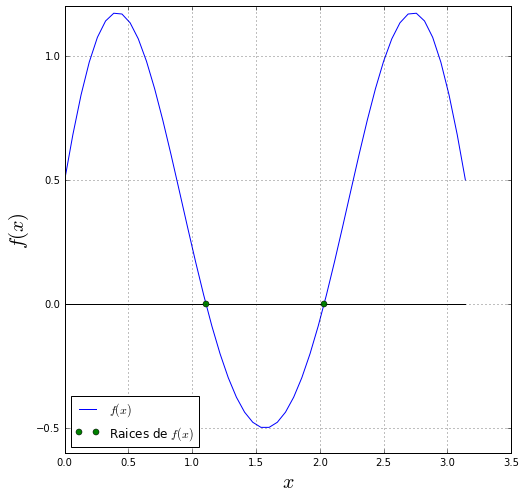

In [7]:
# Se crea una figura
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Se crea el arreglo de valores de x
x = linspace(0, pi)
# Se grafica el eje y=0
ax.plot(x, zeros_like(x), 'black')

# Se calcula la funcion
f_graf = f(x)

# Se calculan las raices de la funcion
raices = encuentra_raices(f, x)

# Se grafica la funcion
ax.plot(x, f_graf, label='$f(x)$')
# Se grafican las raices
ax.plot(raices[:,0],raices[:,1],'o', label='Raices de $f(x)$')

# Se agregan cosas para que la grafica se vea bonita
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$f(x)$", fontsize=20)
ax.grid(True)
ax.legend(loc='best')

# Ejercicio 4

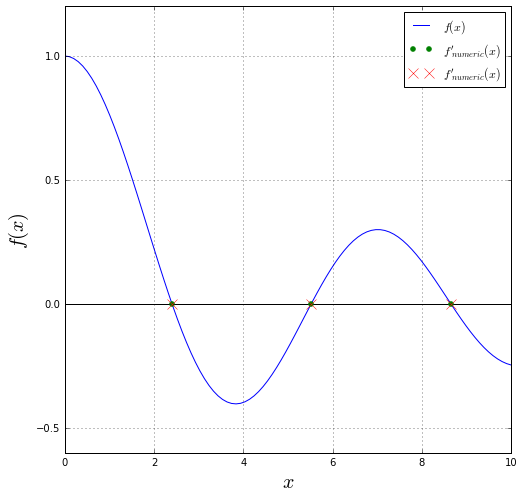

In [8]:
def bessel(x, n=0):
    return jv(n, x)

def bessel_menos(x, n=0):
    return -jv(n, x)

# Se crea una figura
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Se crea el arreglo de valores de x
x = linspace(0,10, 100)
# Se grafica el eje y=0
ax.plot(x, zeros_like(x), 'black')

# Se calcula la funcion
f_graf = jv(0,x)

# se calculan las raices con el metodo de newton con la derivada numerica
raices_numeric = encuentra_raices(bessel, x, args=[0])
# se calculan las raices con el metodo de newton con la derivada analitica
raices_analitic = encuentra_raices(bessel, x, bessel_menos, [0,1])
    
# Se grafica la funcion
ax.plot(x, f_graf, label='$f(x)$')
# Se grafican las raices
ax.plot(raices_analitic[:,0],raices_analitic[:,1],'.', markersize=10, label='$f\'_{numeric}(x)$')
ax.plot(raices_numeric[:,0],raices_numeric[:,1],'x', markersize=10, label='$f\'_{numeric}(x)$')

# Se agregan cosas para que la grafica se vea bonita
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$f(x)$", fontsize=20)
ax.grid(True)
ax.legend(loc='best')

In [9]:
# Se compara raiz con raiz la diferencia
if len(raices_numeric) != len(raices_analitic):
    print "No encontraron el mismo numero de raices"
else:
    for i in xrange(len(raices_numeric)):
        print raices_numeric[i,0] - raices_analitic[i,0]

3.07080393114e-07
2.3969200047e-07
8.67707186103e-08


Podemos ver que el error entre ambas soluciones es del orden de $10^{-7}$.

# Ejercicio 5

In [10]:
def inversa(M):
    # Se calcula el determinante
    det = M[0,0]*M[1,1]-M[1,0]*M[0,1]
    if det == 0:
        # Si el determinante es cero no tiene inversa
        return "No tiene matriz inversa"
    else:
        # Se el determinante es distinto de cero tiene inversa
        return (1./det)*array([[M[1,1], -M[0,1]],[-M[1,0], M[0,0]]])

In [11]:
M1 = array([[1,1],[1,1]])
M2 = array([[-1,3],[5,1]])

print "la inversa de M1 es :\n" + str(inversa(M1))
print "\n"
print "la inversa de M2 es :\n" + str(inversa(M2))
print "\n"
print "El producto de M2 con su inversa es : \n" + str(dot(inversa(M2),M2))

la inversa de M1 es :
No tiene matriz inversa


la inversa de M2 es :
[[-0.0625  0.1875]
 [ 0.3125  0.0625]]


El producto de M2 con su inversa es : 
[[ 1.  0.]
 [ 0.  1.]]


# Ejercicio 6

In [12]:
def suma_numeros(n):
    # Se convierte el numero a una cadena para poder contar cuantos digitos tiene
    n = abs(n)
    N = str(n)
    # Se define la variable donde se ira guardando la suma de los digitos
    suma = 0
    # Para cada elemento de la cadena se cambia el tipo a entero para poder hacer la suma
    for i in xrange(len(N)):
        if N[i]!='.':
            suma += int(N[i])
    return suma

In [13]:
suma_numeros(-104.90)

14

In [14]:
suma_numeros(1.5e4)

6

In [15]:
suma_numeros(80173265)

32